In [198]:
# !pip install torch
# !pip install dice-ml
# !pip install imblearn

In [199]:
from torch.utils.data import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [200]:
class CustomDataLoader:
    def __init__(self, filepath):
        self.filepath = filepath
        self.data = None

    def load_dataset(self):
        self.data = pd.read_csv(self.filepath)

    def preprocess_data(self):
        self.data.dropna(inplace=True)
        self.data = pd.get_dummies(self.data, drop_first=True)          
        bool_cols = self.data.select_dtypes(include=['bool']).columns
        self.data[bool_cols] = self.data[bool_cols].astype(int)

    def get_data_split(self, test_size=0.2, random_state=42):
        X = self.data.drop('stroke', axis=1)
        y = self.data['stroke']
        return train_test_split(X, y, test_size=test_size, random_state=random_state)

    def oversample(self, X_train, y_train):
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X_train, y_train)
        return X_res, y_res

data_loader = CustomDataLoader('../healthcare-dataset-stroke-data.csv')
data_loader.load_dataset()
data_loader.preprocess_data()

In [201]:
data_loader.get_data_split()

[         id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
 3565  68302  40.0             0              0              65.77  31.2   
 898   62716  59.0             0              0              81.64  32.8   
 2707  46498  57.0             0              0             217.40  36.6   
 4198   4148  81.0             0              0              71.18  23.9   
 2746  35315  65.0             0              0              95.88  28.5   
 ...     ...   ...           ...            ...                ...   ...   
 4613  45530  19.0             0              0              89.30  22.1   
 511   27832  51.0             0              0              82.93  29.7   
 3247  64498  53.0             0              0              90.65  22.1   
 3946   8041  11.0             0              0              93.51  20.8   
 916   67864  63.0             0              0              57.82  28.8   
 
       gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
 3565   

In [202]:
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()

X_train, y_train = data_loader.oversample(X_train, y_train)


y_test = y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)


/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [203]:
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,68302,40.000000,0,0,65.770000,31.200000,0,0,1,0,1,0,0,1,0,1,0
1,62716,59.000000,0,0,81.640000,32.800000,0,0,1,0,0,1,0,1,0,0,0
2,46498,57.000000,0,0,217.400000,36.600000,0,0,1,0,1,0,0,1,0,1,0
3,4148,81.000000,0,0,71.180000,23.900000,1,0,1,0,0,1,0,1,1,0,0
4,35315,65.000000,0,0,95.880000,28.500000,1,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7537,67937,76.212411,0,0,189.499430,30.325110,0,0,0,0,1,0,0,1,0,0,1
7538,58928,70.431539,0,0,232.729252,27.063771,0,0,1,0,0,0,0,0,0,1,0
7539,28311,76.816771,0,0,213.019245,29.988552,0,0,1,0,1,0,0,1,0,0,0
7540,2135,79.909279,1,0,98.558905,32.092584,0,0,1,0,0,1,0,0,0,0,0


In [204]:
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,68302,40.000000,0,0,65.770000,31.200000,0,0,1,0,1,0,0,1,0,1,0
1,62716,59.000000,0,0,81.640000,32.800000,0,0,1,0,0,1,0,1,0,0,0
2,46498,57.000000,0,0,217.400000,36.600000,0,0,1,0,1,0,0,1,0,1,0
3,4148,81.000000,0,0,71.180000,23.900000,1,0,1,0,0,1,0,1,1,0,0
4,35315,65.000000,0,0,95.880000,28.500000,1,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7537,67937,76.212411,0,0,189.499430,30.325110,0,0,0,0,1,0,0,1,0,0,1
7538,58928,70.431539,0,0,232.729252,27.063771,0,0,1,0,0,0,0,0,0,1,0
7539,28311,76.816771,0,0,213.019245,29.988552,0,0,1,0,1,0,0,1,0,0,0
7540,2135,79.909279,1,0,98.558905,32.092584,0,0,1,0,0,1,0,0,0,0,0


In [205]:
# Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5530014224751066
Accuracy 0.9022403258655805


In [206]:

y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)


test_indices = y_test_series[y_test_series == 1].index.tolist()
pred_indices = y_pred_series[y_pred_series == 1].index.tolist()

print("Test indices:", test_indices)
print("Prediction indices:", pred_indices)

Test indices: [11, 30, 35, 62, 73, 110, 113, 122, 143, 166, 167, 198, 229, 238, 274, 277, 299, 312, 327, 336, 362, 388, 426, 434, 475, 488, 499, 538, 573, 582, 592, 598, 613, 682, 685, 734, 752, 795, 804, 807, 809, 832, 851, 873, 878, 903, 910, 917, 928, 944, 964, 965, 978]
Prediction indices: [0, 5, 49, 76, 79, 90, 101, 131, 134, 138, 142, 206, 238, 254, 265, 281, 312, 349, 353, 357, 368, 370, 375, 388, 417, 418, 426, 433, 462, 466, 486, 507, 583, 587, 596, 638, 644, 649, 651, 656, 675, 676, 704, 712, 734, 785, 787, 788, 795, 797, 807, 823, 850, 888, 892, 910, 960, 961, 963, 964, 971]


In [207]:
# Create diverse counterfactual explanations
import dice_ml

# Dataset
data_dice = dice_ml.Data(dataframe=data_loader.data,
                         continuous_features=['age',
                                              'avg_glucose_level',
                                              'bmi'],
                         outcome_name='stroke')

In [208]:
# Model
rf_dice = dice_ml.Model(model=rf,
                        backend="sklearn")
explainer = dice_ml.Dice(data_dice,
                         rf_dice,
                         method="random") # Random sampling, genetic algorithm, kd-tree,...

In [209]:
X_test[10:11]

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
10,12336,73.0,0,0,87.56,24.1,0,0,1,0,0,1,0,1,0,1,0


In [210]:

input_datapoint = X_test[10:11]



In [211]:
X_test[10:11]

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
10,12336,73.0,0,0,87.56,24.1,0,0,1,0,0,1,0,1,0,1,0


In [212]:
bool_cols = input_datapoint.select_dtypes(include=['bool']).columns    

In [213]:
input_datapoint[bool_cols] = input_datapoint[bool_cols].astype(int)

In [214]:
input_datapoint

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
10,12336,73.0,0,0,87.56,24.1,0,0,1,0,0,1,0,1,0,1,0


In [215]:
cf = explainer.generate_counterfactuals(input_datapoint,
                                  total_CFs=3,
                                  desired_class="opposite")

  0%|          | 0/1 [00:00<?, ?it/s]/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/dice_ml/ex

In [216]:


cf.visualize_as_dataframe(show_only_changes=True)


Query instance (original outcome : 0)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,12336,73.0,0,0,87.559998,24.1,0,0,1,0,0,1,0,1,0,1,0,0



Diverse Counterfactual set (new outcome: 1)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,-,0.0,-,1.0
1,-,-,-,-,-,-,-,-,0.0,-,-,0.0,-,-,-,-,-,1.0
2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0


<h1>Regression</h1>

In [217]:
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install tensorflow



In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [219]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = df = pd.read_csv("../SeoulBikeData.csv", encoding="ISO-8859-1").drop(["Date", "Holiday", "Seasons"], axis=1)

In [220]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [221]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

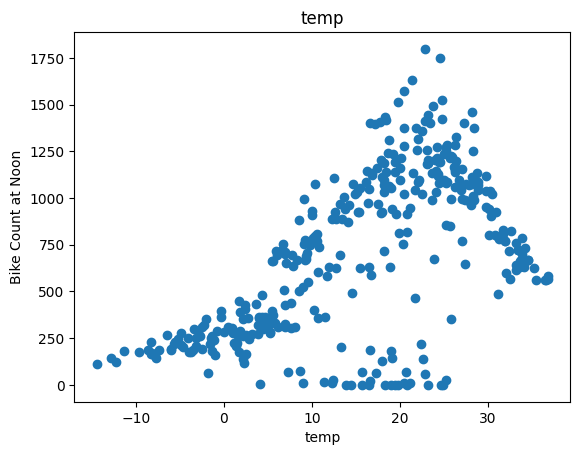

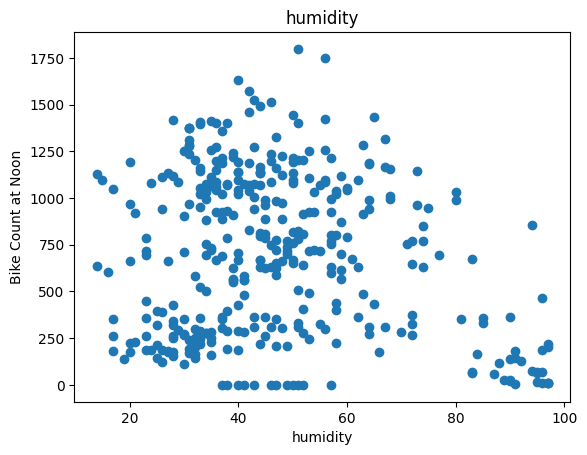

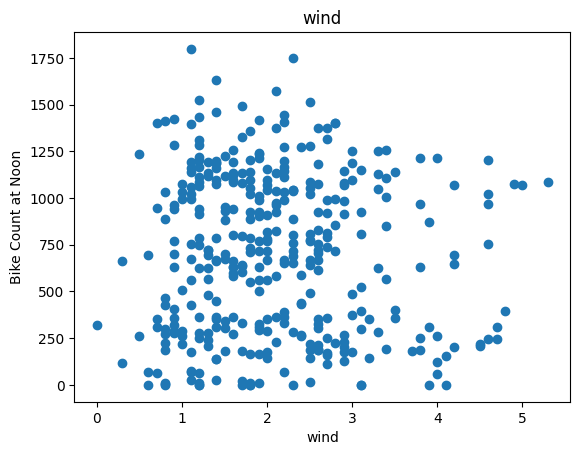

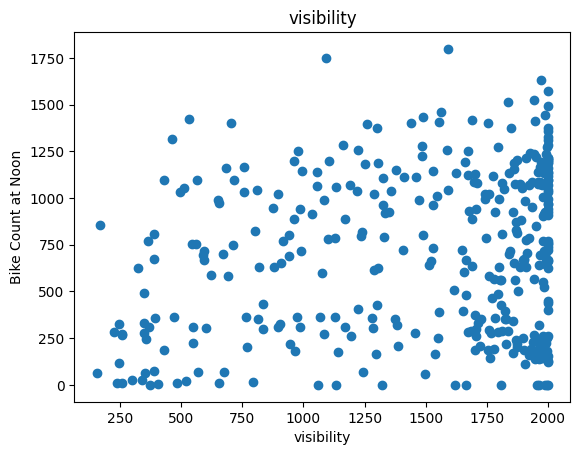

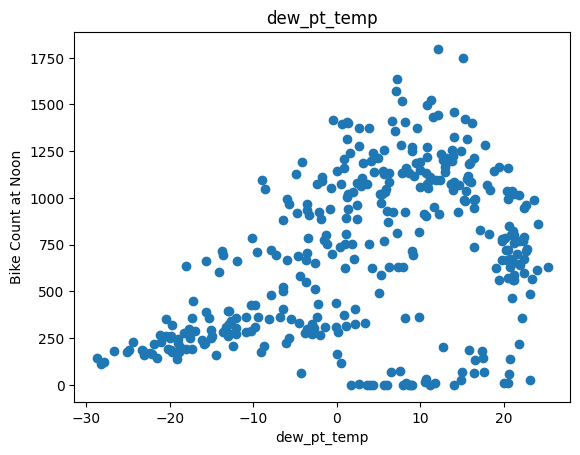

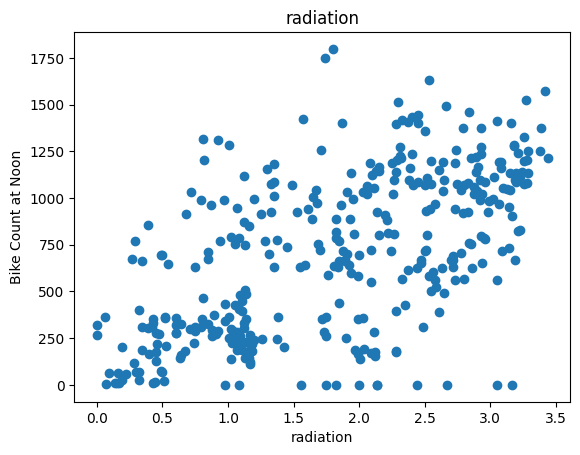

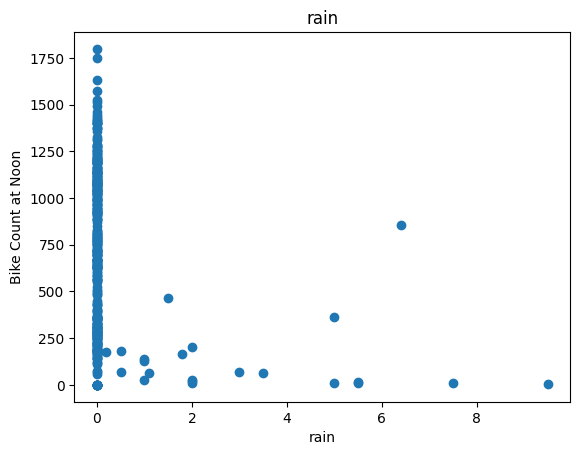

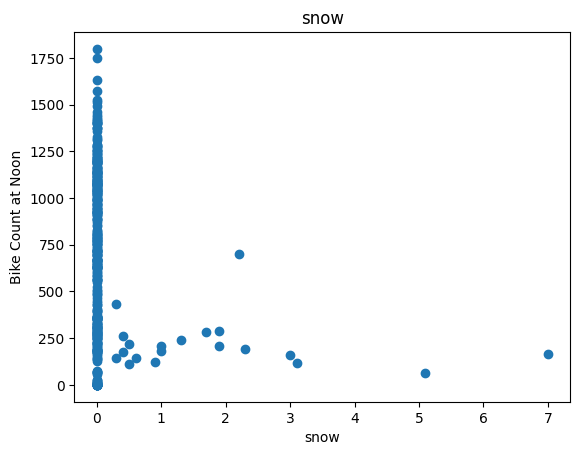

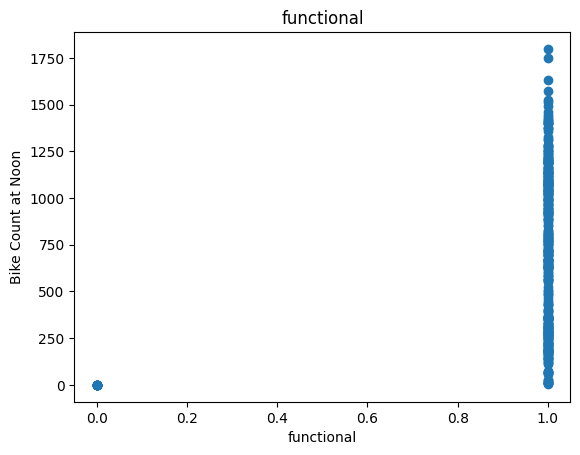

In [222]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [223]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [224]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [225]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [226]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [227]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [228]:
temp_reg.score(X_test_temp, y_test_temp)

0.33984532608910034

In [229]:
val[0:1]

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
2484,813,19.9,44,7.2,2.22,0.0,0.0


In [230]:
np.array(val[0:1]).reshape(-1,)

array([813.  ,  19.9 ,  44.  ,   7.2 ,   2.22,   0.  ,   0.  ])

In [231]:
train

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
828,290,-2.9,33,-16.9,0.92,0.0,0.0
348,309,-2.5,43,-13.3,0.34,0.0,0.0
8556,717,5.9,23,-13.7,1.88,0.0,0.0
3876,1161,20.0,47,8.3,3.08,0.0,0.0
7932,1076,10.4,41,-2.3,1.33,0.0,0.0
...,...,...,...,...,...,...,...
4668,1747,24.5,56,15.1,1.74,0.0,0.0
1980,351,2.2,17,-20.4,1.99,0.0,0.0
5796,663,33.6,48,21.0,1.89,0.0,0.0
2724,806,10.6,52,1.1,2.27,0.0,0.0


In [232]:
X_val_temp[0]

array([19.9])

In [233]:
val[["temp"]].iloc[[0]]

,temp
2484,19.9


In [234]:
import dice_ml
import pandas as pd

# Keep only the feature(s) your model was trained on
train_temp = train[["temp", "bike_count"]].copy()

# Define DiCE data object
d = dice_ml.Data(
    dataframe=train_temp,
    continuous_features=["temp"],
    outcome_name="bike_count"
)

# Wrap your sklearn linear regression
m = dice_ml.Model(model=temp_reg, backend="sklearn", model_type="regressor")


# Create explainer
exp = dice_ml.Dice(d, m, method="random")

# Build query instance properly (X_val_temp[0] = array([1.]))
query_instance = val[["temp"]].iloc[[0]]


# Generate counterfactuals
cf = exp.generate_counterfactuals(
    query_instance,
    total_CFs=3,
    desired_range = [800,1200]
)

cf.visualize_as_dataframe(show_only_changes=True)


  0%|          | 0/1 [00:00<?, ?it/s]/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarn

Query instance (original outcome : 814.0)


,temp,bike_count
0,19.9,814.0



Diverse Counterfactual set (new outcome: [800, 1200])


,temp,bike_count
0,29.1,1007.8898315429688
1,32.3,1075.33349609375
2,35.4,1140.669677734375


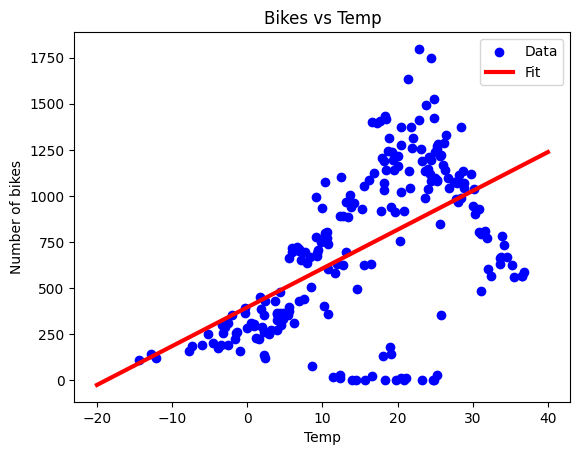

In [235]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

<h1> MultipleLinear Regression </h1>

In [236]:
train_mul, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train_mul, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [237]:
train_mul

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
7764,1407,17.7,33,1.2,2.37,0.0,0.0
8676,672,9.3,61,2.1,0.85,0.0,0.0
5340,964,28.1,73,22.7,0.87,0.0,0.0
3540,1142,19.5,40,5.5,2.89,0.0,0.0
3084,709,6.9,30,-9.5,0.85,0.0,0.0
...,...,...,...,...,...,...,...
6948,989,23.7,64,16.4,0.79,0.0,0.0
1500,240,-1.1,31,-16.1,1.20,0.0,1.3
3348,919,17.8,21,-4.8,2.79,0.0,0.0
5412,1039,30.2,58,21.0,2.64,0.0,0.0


In [238]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [239]:
all_reg.score(X_test_all, y_test_all)

0.506768054399686

In [240]:
y_pred_lr = all_reg.predict(X_test_all)

In [241]:
val[["temp"]].iloc[[0]]

,temp
12,1.7


In [242]:
import dice_ml
import pandas as pd


# Define DiCE data object
d = dice_ml.Data(
    dataframe=train_mul,
    continuous_features=["temp", "humidity", "dew_pt_temp", "radiation", "rain", "snow"],
    outcome_name="bike_count"
)

m = dice_ml.Model(model=all_reg, backend="sklearn", model_type="regressor")


exp = dice_ml.Dice(d, m, method="random")

query_instance = val[["temp", "humidity", "dew_pt_temp", "radiation", "rain", "snow"]].iloc[[0]]


cf = exp.generate_counterfactuals(
    query_instance,
    total_CFs=3,
    desired_range = [100,300]
)

cf.visualize_as_dataframe(show_only_changes=True)


  0%|          | 0/1 [00:00<?, ?it/s]/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarn

Query instance (original outcome : 407.0)


,temp,humidity,dew_pt_temp,radiation,rain,snow,bike_count
0,1.7,23,-17.200001,1.11,0.0,0.0,407.0



Diverse Counterfactual set (new outcome: [100, 300])


,temp,humidity,dew_pt_temp,radiation,rain,snow,bike_count
0,-,-,-,0.25,-,5.3,288.0174560546875
1,35.1,-,-,3.18,-,-,117.13428497314453
2,15.2,-,-,-,-,0.8,184.39674377441406


<h1>Neural Net</h1>

In [243]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [244]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/Users/shamit/Documents/Projects/RA/XAI/venv/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [245]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [246]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [247]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

In [264]:
import dice_ml
import pandas as pd


train_temp = train[["temp", "bike_count"]].copy()

# Define DiCE Data object
d = dice_ml.Data(
    dataframe=train_temp,
    continuous_features=["temp"],
    outcome_name="bike_count"
)

# Wrap Keras model with TF2 backend
m = dice_ml.Model(model=temp_nn_model, backend="TF2", model_type="regressor")

# Create DiCE explainer
exp = dice_ml.Dice(d, m, method="random")

# Build query instance with all features
query_instance = query_instance = val[["temp"]].iloc[[0]]

# Generate CFs
cf = exp.generate_counterfactuals(
    query_instance,  # DataFrame with proper columns
    total_CFs=3,
    desired_range=[300, 400]
)

# Visualize only the features that change
cf.visualize_as_dataframe(show_only_changes=True)



100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

Query instance (original outcome : 287.0)


,temp,bike_count
0,1.7,287.0



Diverse Counterfactual set (new outcome: [300, 400])


,temp,bike_count
0,3.3,320.2272033691406
1,6.6,389.73504638671875
2,4.5,345.5027770996094


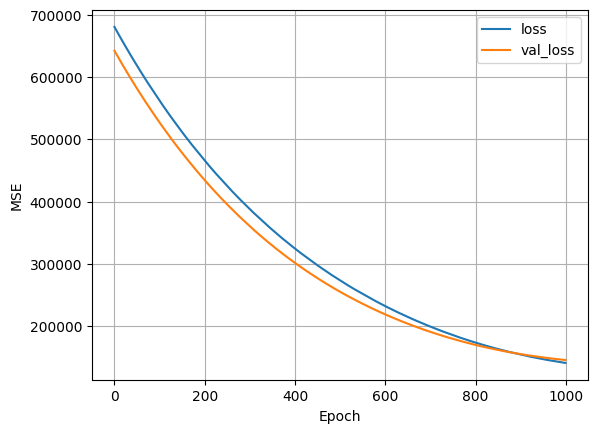

In [69]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


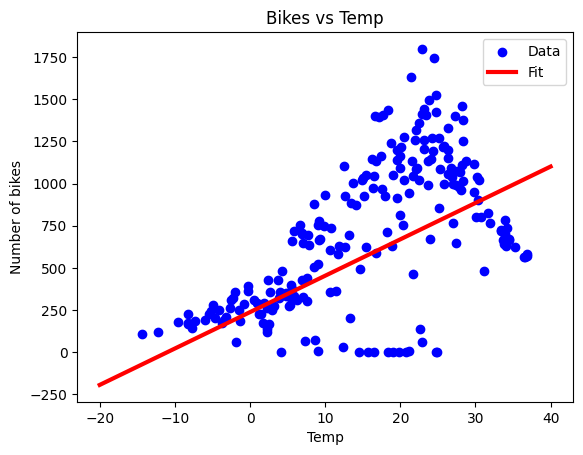

In [70]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [71]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [72]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

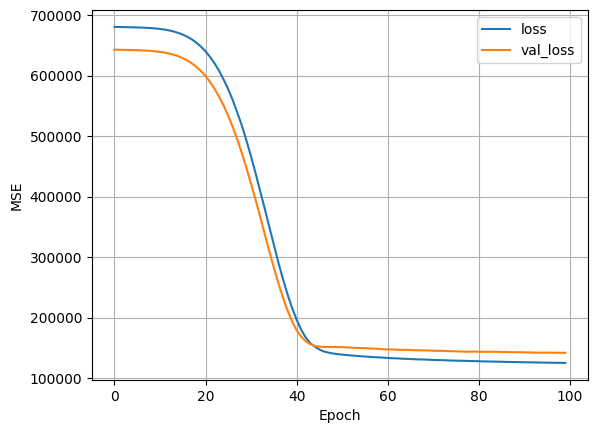

In [73]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


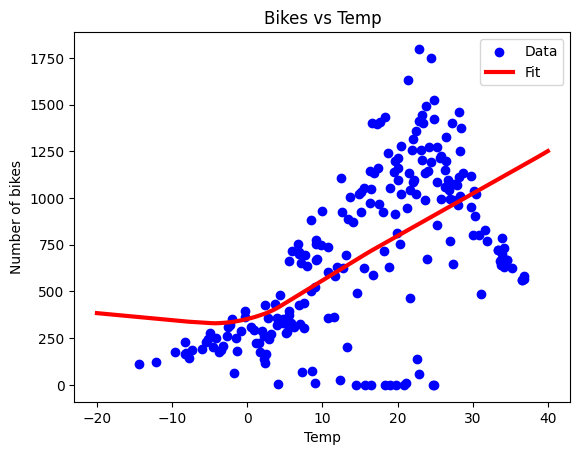

In [74]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [75]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [76]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [77]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

In [267]:
import dice_ml
import pandas as pd



# Define DiCE Data object
d = dice_ml.Data(
    dataframe=train,
    continuous_features=["temp", "humidity", "dew_pt_temp", "radiation", "rain", "snow"],

    outcome_name="bike_count"
)

# Wrap Keras model with TF2 backend
m = dice_ml.Model(model=nn_model, backend="TF2", model_type="regressor")

# Create DiCE explainer
exp = dice_ml.Dice(d, m, method="random")

# Build query instance with all features
query_instance = val[["temp", "humidity", "dew_pt_temp", "radiation", "rain", "snow"]].iloc[[0]]

# Generate CFs
cf = exp.generate_counterfactuals(
    query_instance,
    total_CFs=3,
    desired_range=[300, 400]
)

# Visualize only the features that change
cf.visualize_as_dataframe(show_only_changes=True)



100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

Query instance (original outcome : 421.0)


,temp,humidity,dew_pt_temp,radiation,rain,snow,bike_count
0,1.7,23,-17.200001,1.11,0.0,0.0,421.0



Diverse Counterfactual set (new outcome: [300, 400])


,temp,humidity,dew_pt_temp,radiation,rain,snow,bike_count
0,-,52.0,-,2.62,-,-,354.3138732910156
1,-4.5,33.0,-,-,-,-,364.3631591796875
2,-7.7,-,-,-,-,0.4,395.6639099121094


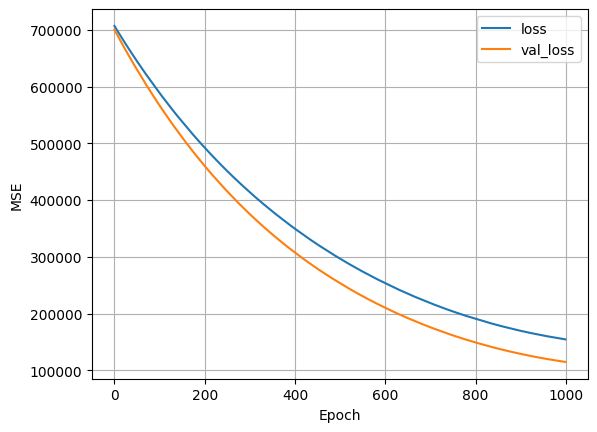

In [268]:
plot_loss(history)

In [269]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [270]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [271]:
MSE(y_pred_lr, y_test_all)

np.float64(90200.18958050081)

In [272]:
MSE(y_pred_nn, y_test_all)

np.float64(104339.5205826142)

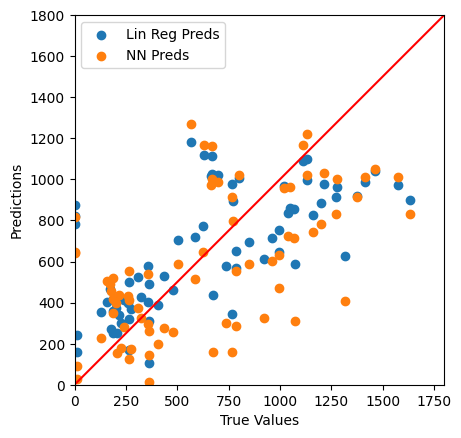

In [83]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")